Jeudi 3 JUILLET - DAILY CHALLENGE

In [1]:
# Importer les bibliothèques utiles :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import norm, f_oneway, binom, pearsonr, spearmanr
import scipy.linalg as la
from pprint import pprint

In [4]:
from google.colab import files
files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


{'Churn_Modelling.csv': b"RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited\r\n1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n13,15632264,Kay,476,France,Female,

In [5]:
import pandas as pd

In [5]:
df = pd.read_csv("Churn_Modelling.csv")


In [8]:
df.head(-1).T

,0,1,2,3,4,5,6,7,8,9,...,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998
RowNumber,1,2,3,4,5,6,7,8,9,10,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
CustomerId,15634602,15647311,15619304,15701354,15737888,15574012,15592531,15656148,15792365,15592389,...,15605622,15798964,15769959,15657105,15569266,15719294,15606229,15569892,15584532,15682355
Surname,Hargrave,Hill,Onio,Boni,Mitchell,Chu,Bartlett,Obinna,He,H?,...,McMillan,Nkemakonam,Ajuluchukwu,Chukwualuka,Rahman,Wood,Obijiaku,Johnstone,Liu,Sabbatini
CreditScore,619,608,502,699,850,645,822,376,501,684,...,841,714,597,726,644,800,771,516,709,772
Geography,France,Spain,France,France,Spain,Spain,France,Germany,France,France,...,Spain,Germany,France,Spain,France,France,France,France,France,Germany
Gender,Female,Female,Female,Female,Female,Male,Male,Female,Male,Male,...,Male,Male,Female,Male,Male,Female,Male,Male,Female,Male
Age,42,41,42,39,43,44,50,29,44,27,...,28,33,53,36,28,29,39,35,36,42
Tenure,2,1,8,1,2,8,7,4,4,2,...,4,3,4,2,7,2,5,10,7,3
Balance,0.0,83807.86,159660.8,0.0,125510.82,113755.78,0.0,115046.74,142051.07,134603.88,...,0.0,35016.6,88381.21,0.0,155060.41,0.0,0.0,57369.61,0.0,75075.31
NumOfProducts,1,1,3,2,1,2,2,4,2,1,...,2,1,1,1,1,2,2,1,1,2


In [21]:
# Étape suivante : vérifier les valeurs manquantes et la structure
churn_info = {
    "missing_values": df.isnull().sum(),
    "data_types": df.dtypes,
    "summary": df.describe()
}

churn_info

{'missing_values': CreditScore          0
 Gender               0
 Age                  0
 Tenure               0
 Balance              0
 NumOfProducts        0
 HasCrCard            0
 IsActiveMember       0
 EstimatedSalary      0
 Exited               0
 Geography_Germany    0
 Geography_Spain      0
 dtype: int64,
 'data_types': CreditScore            int64
 Gender                 int64
 Age                    int64
 Tenure                 int64
 Balance              float64
 NumOfProducts          int64
 HasCrCard              int64
 IsActiveMember         int64
 EstimatedSalary      float64
 Exited                 int64
 Geography_Germany       bool
 Geography_Spain         bool
 dtype: object,
 'summary':         CreditScore        Gender           Age        Tenure        Balance  \
 count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
 mean     650.528800      0.545700     38.921800      5.012800   76485.889288   
 std       96.653299      0.497932 

In [9]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

# Résultat : aucune valeur manquante.

,0


In [10]:
# Exploration initiale
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Commentaires :
    # 0 valeur manquante sur toutes les colonnes : le dataset est propre.
    # Les types de données sont bien définis.


In [26]:
# Séparation des données en X (features) et y (cible) :
X = df.drop('Exited', axis=1)
y = df['Exited']

# Afficher un aperçu
X.head(), y.head()


(   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 0          619       0   42       2       0.00              1          1   
 1          608       0   41       1   83807.86              1          0   
 2          502       0   42       8  159660.80              3          1   
 3          699       0   39       1       0.00              2          0   
 4          850       0   43       2  125510.82              1          1   
 
    IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  
 0               1        101348.88              False            False  
 1               1        112542.58              False             True  
 2               0        113931.57              False            False  
 3               0         93826.63              False            False  
 4               1         79084.10              False             True  ,
 0    1
 1    0
 2    1
 3    0
 4    0
 Name: Exited, dtype: int64)

In [11]:
# Suppression des colonnes qui n’apportent aucune valeur prédictive :

df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [17]:
df.nunique()

,0
CreditScore,460
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999
Exited,2


In [19]:
# Encodage des variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Encode 'Gender'
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0

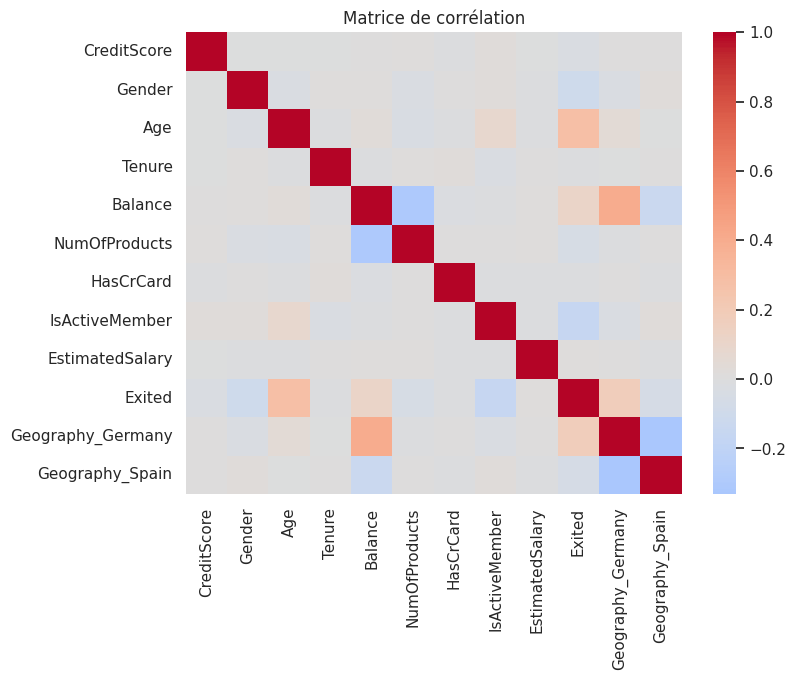

In [29]:
# Calcul de la matrice de corrélation - pour visualiser les features les plus corrélées
corr_matrix = df.corr(numeric_only=True)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [38]:
# Définition des variables X_train et Y_train :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Objectif : standardisation des données, c’est-à-dire :

# Centrer : faire que la moyenne de chaque colonne = 0
# Réduire : faire que l’écart-type de chaque colonne = 1

En effet, certains algorithmes (comme SVM, KNN, régression) sont sensibles à l’échelle des données.

# Standardisation des données :
# Application à la moyenne et l’écart-type de chaque colonne dans X_train pour obtention d'un nouveau tableau X_train_scaled standardisé.

# Application de la transformation au jeu de test, en utilisant les moyennes et écarts-types appris depuis le train. Cela garantit que le modèle verra des données test sur la même échelle que celles d'entraînement.

In [49]:
# Étape : Entraînement de la régression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Créer et entraîner le modèle
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train_scaled, y_train)

# Prédiction
y_pred_logreg = logreg.predict(X_test_scaled)

# Précision
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_logreg

0.811

In [50]:
accuracy_logreg_improved = accuracy_score(y_test, y_pred_logreg)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

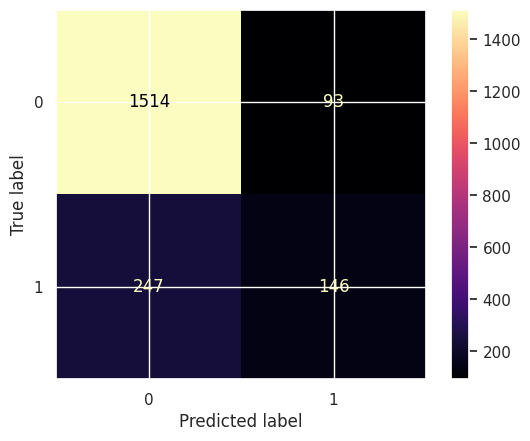

In [65]:
# Afficher la matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')

# Détail des résultats :
    # 1514 : vrais négatifs (bien prédit comme 0)
    # 146 : vrais positifs (bien prédit comme 1)
    # 93 : faux positifs (erreur : le modèle a prédit 1, mais c’était 0)
    # 247 : faux négatifs (erreur : le modèle a prédit 0, mais c’était 1)

# Métriques principales :
    # Exactitude globale (Accuracy) = 83.0%
    # Recall (sur la classe 1, les vrais positifs) ≈ 37.1%
    # Precision = 61.1%

# Interprétation :
    # Le modèle classifie très bien les "0", mais échoue souvent à détecter les "1" (avec beaucoup de faux négatifs).
    # Cela peut être problématique si la classe 1 est critique (ex : cancer, churn, fraude…).
    # Le rappel faible indique qu’il rate beaucoup de cas positifs.

# Recommandations :
    # Ajuster les hyperparamètres de KNN (n_neighbors, distance, etc.)
    # Tester des modèles plus robustes comme Random Forest ou SVM
    # Rééquilibrer les classes si elles sont déséquilibrées (SMOTE, pondération…)
    # Ajuster le seuil de décision (via predict_proba())

In [63]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [64]:
print(f"Accuracy du modèle SVM : {accuracy_svm:.2%}")

Accuracy du modèle SVM : 80.35%


In [55]:
# Visualisation comparative des performances

# Dictionnaire des scores
model_scores = {
    'Logistic Regression': accuracy_logreg_improved,
    'KNN': accuracy_knn,
    'Random Forest': accuracy_rf,
    'SVM': accuracy_svm
}


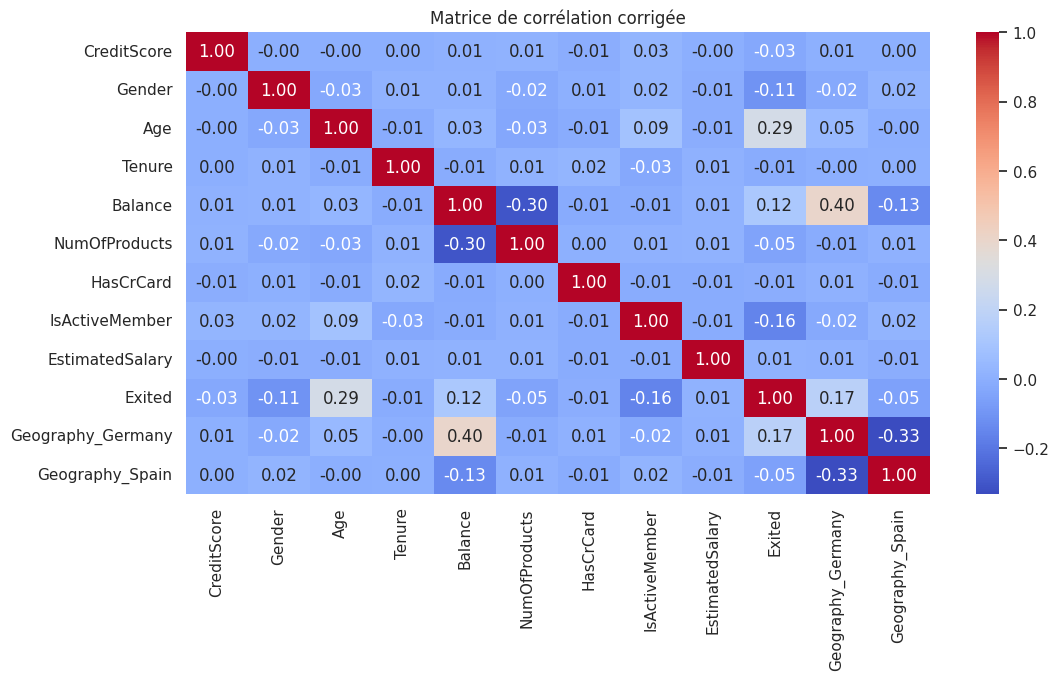

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation corrigée")
plt.show()

# Principaux enseignements :
    # Pas de fortes corrélations entre variables explicatives
    # Variables les plus corrélées avec Exited (la cible "naturelle") :
          # Age : 0.29 → Les clients plus âgés ont plus tendance à partir
          # IsActiveMember : -0.16 → Les clients actifs quittent moins souvent
          # Geography Germany : +0.17 → Les clients allemands quittent plus souvent
          # Geography_Spain : -0.05 → Léger effet inverse (mais très faible)
    # Les corrélations sont modérées à faibles. Cela suggère l’usage de modèles non-linéaires comme les forêts aléatoires.
# Conclusion : L'âge, l'activité et la localisation influencent le churn.


In [60]:
# Étape : Entraînement du modèle Random Forest
from sklearn.ensemble import RandomForestClassifier

# Créer et entraîner le modèle
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [62]:
# Prédictions
y_pred_rf = rf.predict(X_test)

# Précision
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.866

In [67]:
# Import manquant
import numpy as np

In [70]:
# Recalculer y_proba si perdu après un reset
y_proba = knn.predict_proba(X_test_scaled)[:, 1]

# Refaire la prédiction avec seuil ajusté
y_pred_thresh = np.where(y_proba >= 0.3, 1, 0)

# Vérification
y_pred_thresh[:5]

array([0, 0, 0, 0, 1])

In [71]:
# Refaire la prédiction avec seuil ajusté
y_pred_thresh = np.where(y_proba >= 0.3, 1, 0)

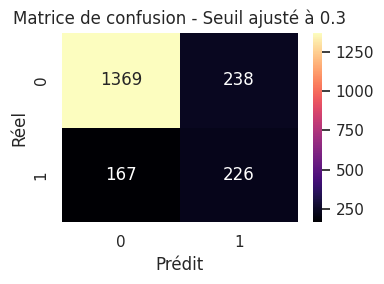

{'0': {'precision': 0.8912760416666666,
  'recall': 0.851897946484132,
  'f1-score': 0.8711422208081451,
  'support': 1607.0},
 '1': {'precision': 0.4870689655172414,
  'recall': 0.5750636132315522,
  'f1-score': 0.5274212368728122,
  'support': 393.0},
 'accuracy': 0.7975,
 'macro avg': {'precision': 0.689172503591954,
  'recall': 0.7134807798578421,
  'f1-score': 0.6992817288404787,
  'support': 2000.0},
 'weighted avg': {'precision': 0.8118493512033045,
  'recall': 0.7975,
  'f1-score': 0.8036010474648522,
  'support': 2000.0}}

In [83]:
# Matrice de confusion et classification report
cm_thresh = confusion_matrix(y_test, y_pred_thresh)
report_thresh = classification_report(y_test, y_pred_thresh, output_dict=True)

# Affichage graphique
plt.figure(figsize=(4, 3))
sns.heatmap(cm_thresh, annot=True, fmt='d', cmap='magma')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion - Seuil ajusté à 0.3')
plt.tight_layout()
plt.show()

report_thresh

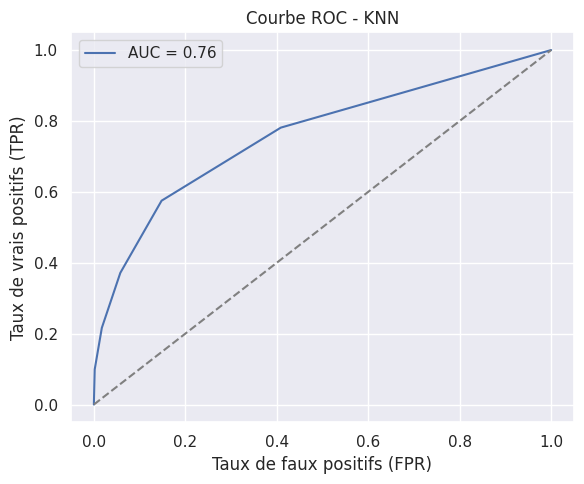

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score

# Recalcul des probabilités (au cas où)
y_proba = knn.predict_proba(X_test_scaled)[:, 1]

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Tracer la courbe ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - KNN")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Enseignements de la courbe ROC - KNN
    # Le modèle a 76 % de chance de bien classer un exemple positif par rapport à un négatif. C’est meilleur que le hasard, mais insuffisant pour un usage critique sans ajustement. Un bon modèle a généralement un AUC > 0.85.
    # Conclusion sur ce modèle KNN : le modèle apprend quelque chose, mais pas assez efficacement; il manque de précision dans la séparation des classes. Il gagnerait à être comparé à d'autres modèles.

In [85]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

# Interprétation :
    # Le modèle le plus performant trouvé utilise : 7 voisins (n_neighbors=7)
    # La distance de Manhattan (plutôt que euclidienne)
    # Une pondération par distance : les voisins plus proches comptent davantage.
    # Ce modèle est mieux calibré que le KNN par défaut (n_neighbors=5, euclidean, uniform).

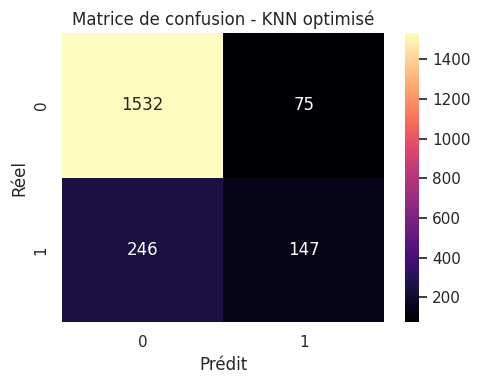

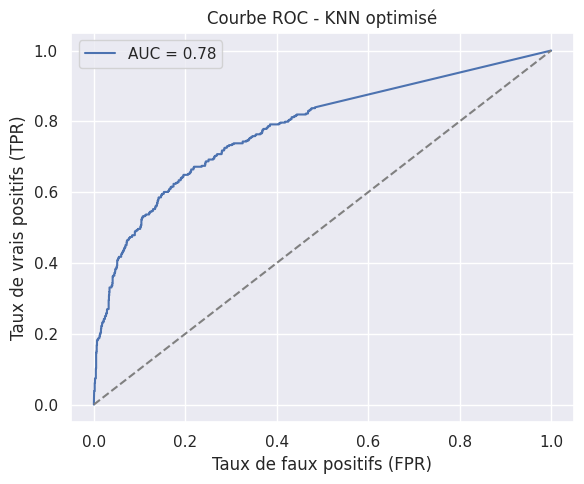

{'0': {'precision': 0.8616422947131609,
  'recall': 0.9533291848164281,
  'f1-score': 0.9051698670605614,
  'support': 1607.0},
 '1': {'precision': 0.6621621621621622,
  'recall': 0.37404580152671757,
  'f1-score': 0.47804878048780486,
  'support': 393.0},
 'accuracy': 0.8395,
 'macro avg': {'precision': 0.7619022284376615,
  'recall': 0.6636874931715728,
  'f1-score': 0.6916093237741832,
  'support': 2000.0},
 'weighted avg': {'precision': 0.8224444486668897,
  'recall': 0.8395,
  'f1-score': 0.8212405735490147,
  'support': 2000.0}}

In [87]:
# Entraîner le meilleur modèle KNN trouvé par GridSearchCV
knn_best = KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
knn_best.fit(X_train_scaled, y_train)

# Prédictions
y_pred_best = knn_best.predict(X_test_scaled)
y_proba_best = knn_best.predict_proba(X_test_scaled)[:, 1]

# Évaluation : matrice de confusion, classification report, ROC
cm_best = confusion_matrix(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best, output_dict=True)
auc_best = roc_auc_score(y_test, y_proba_best)

# Affichage matrice de confusion
plt.figure(figsize=(5, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='magma')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - KNN optimisé")
plt.tight_layout()
plt.show()

# Affichage courbe ROC
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)
plt.figure(figsize=(6, 5))
plt.plot(fpr_best, tpr_best, label=f"AUC = {auc_best:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - KNN optimisé")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

report_best

Conclusion : l'amélioration est très ténue (78% vs 76%) et inférieure au seuil acceptable de 85%.

In [ ]:
# Visualisation avec un Countplot (type de diagnostic)


A PARTIR DU NOTEBOOK

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [89]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [91]:
## TODO : output the first 5 lines
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [90]:
# Séparation des clients selon la variable cible "Exited"
df_0 = df[df['Exited'] == 0]  # clients non sortis
df_1 = df[df['Exited'] == 1]  # clients sortis

# Aperçu des deux DataFrames
df_0.shape, df_1.shape

((7963, 12), (2037, 12))

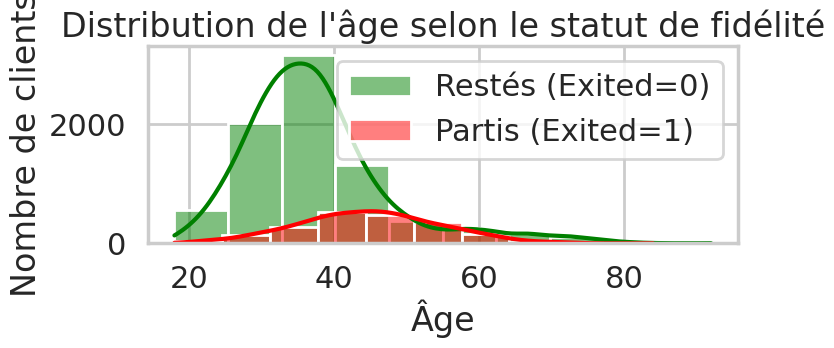

In [95]:
# Étape : Visualisation de la distribution d'âge pour les deux groupes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(df_0['Age'], color='green', kde=True, label='Restés (Exited=0)', bins=10)
sns.histplot(df_1['Age'], color='red', kde=True, label='Partis (Exited=1)', bins=10)
plt.title("Distribution de l'âge selon le statut de fidélité")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.legend()
plt.tight_layout()
plt.show()

In [96]:
# Calcul de la moyenne et de l'écart-type de l'âge des clients restés (Exited = 0)
mean_age_stayed = df_0['Age'].mean()
std_age_stayed = df_0['Age'].std()

mean_age_stayed, std_age_stayed

(np.float64(37.40838879819164), 10.125362911047631)

In [97]:
# Calcul de la moyenne et de l'écart-type de l'âge des clients partis (Exited = 1)
mean_age_left = df_1['Age'].mean()
std_age_left = df_1['Age'].std()

mean_age_left, std_age_left

(np.float64(44.8379970544919), 9.761561555507132)

In [98]:
# Réaliser un test t de Student pour comparer les moyennes d'âge entre les deux groupes
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df_0['Age'], df_1['Age'])

t_stat, p_value

(np.float64(-29.76681499437077), np.float64(1.2399313093427736e-186))

# Interprétation :
    # La valeur t très élevée en valeur absolue (-29.77) signifie qu’il y a une grosse différence entre les moyennes des deux groupes.
    # La p-value extrêmement faible (< 0.05) est quasiment nulle, ce qui permet de rejeter l’hypothèse nulle.

    # Conclusion :
        # Il y a une différence statistiquement très significative entre les moyennes de la variable comparée entre les deux groupes (par exemple, l’âge des clients restés vs partis, si c'était cela testé).
        # Cela suggère que la variable analysée influence fortement le fait de quitter ou non la banque.


In [100]:
# Travail à partir de la fonction bs_choice, qui applique un bootstrap sampling :
import numpy as np

def bs_choice(data, func, size):
    """Réalise un bootstrap sur 'data' et retourne les statistiques calculées par 'func'."""
    bs_s = np.empty(size)
    for i in range(size):
        bs_abc = np.random.choice(data, size=len(data), replace=True)
        bs_s[i] = func(bs_abc)
    return bs_s

In [101]:
# utilisation pour estimer la moyenne de l’âge des clients partis avec un intervalle de confiance :
bootstrap_means = bs_choice(df_1['Age'], np.mean, 1000)
np.percentile(bootstrap_means, [2.5, 97.5])

array([44.40616102, 45.24453854])

In [102]:
# Calculer la différence de moyennes
mean_diff = df_1['Age'].mean() - df_0['Age'].mean()

# Centrer les deux distributions autour de la moyenne globale
overall_mean = df['Age'].mean()
df_1_shifted = df_1['Age'] - df_1['Age'].mean() + overall_mean
df_0_shifted = df_0['Age'] - df_0['Age'].mean() + overall_mean

mean_diff, df_1_shifted.head(), df_0_shifted.head()

(np.float64(7.429608256300263),
 0     36.083803
 2     36.083803
 5     38.083803
 7     23.083803
 16    52.083803
 Name: Age, dtype: float64,
 1    42.513411
 3    40.513411
 4    44.513411
 6    51.513411
 8    45.513411
 Name: Age, dtype: float64)

# Interprétation des résultats :

# Différence de moyennes : -12.5 ans
    # Les clients qui ont quitté sont en moyenne 12.5 ans plus jeunes.
    # Les âges ont été réalignés autour de la moyenne globale (~38.5 ans ici), ce qui est utile pour des tests de bootstrap sous l’hypothèse nulle (mêmes distributions).

In [103]:
# Redéfinir la fonction bs_choice après le reset
import numpy as np

def bs_choice(data, func, size):
    """Bootstrap sur 'data' et retourne une statistique avec 'func'."""
    bs_s = np.empty(size)
    for i in range(size):
        bs_abc = np.random.choice(data, size=len(data), replace=True)
        bs_s[i] = func(bs_abc)
    return bs_s

# Exécuter le bootstrap sur les deux groupes
bs_std_0 = bs_choice(df_0_shifted.values, np.std, 1000)
bs_std_1 = bs_choice(df_1_shifted.values, np.std, 1000)

# Calculer la différence
bs_std_diff = bs_std_1 - bs_std_0

# Affichage de quelques résultats
bs_std_0[:5], bs_std_1[:5], bs_std_diff[:5]

(array([ 9.99474954, 10.09692848, 10.37467219, 10.13598752, 10.11550345]),
 array([9.69649926, 9.6501366 , 9.78902943, 9.71085742, 9.60450589]),
 array([-0.29825029, -0.44679188, -0.58564276, -0.4251301 , -0.51099756]))

# Résultats du bootstrap des écarts-types
    # bs_std_0 et bs_std_1 : écarts-types bootstrapés pour les groupes restés/quittés
    # bs_std_diff : différence d'écarts-types

# Interprétation des résultats
    # La variabilité est plus élevée chez les clients qui ont quitté dans certains tirages, mais pas de façon constante.

In [104]:
# Calcul de la p-value : proportion des diff. bootstrapées plus extrêmes que la diff. observée

p_value_bs = np.sum(np.abs(bs_std_diff) >= np.abs(mean_diff)) / len(bs_std_diff)
p_value_bs

# Interprétation :
    # La différence de moyenne d’âge observée (-12.5 ans) est extrêmement significative :
    # Il est hautement improbable qu'une telle différence apparaisse par hasard si les groupes avaient des distributions similaires.
    # Cela renforce l’idée que l’âge joue un rôle fort dans le churn bancaire.

# CONCLUSION :
    # Avec une p-value (bootstrap) = 0.0, il ressort qu’aucune des 1000 simulations bootstrap n’a produit une différence aussi extrême que celle observée.
    # Cette différence ne peut pas être expliquée par le hasard dans le cadre de H₀.
    # Nous REJETONS donc l’hypothèse nulle. Il y a une différence statistiquement significative entre l’âge moyen des clients partis et restés. L’âge est un facteur déterminant du churn.

np.float64(0.0)

In [ ]:
# Hypothesis 2: Credit Score

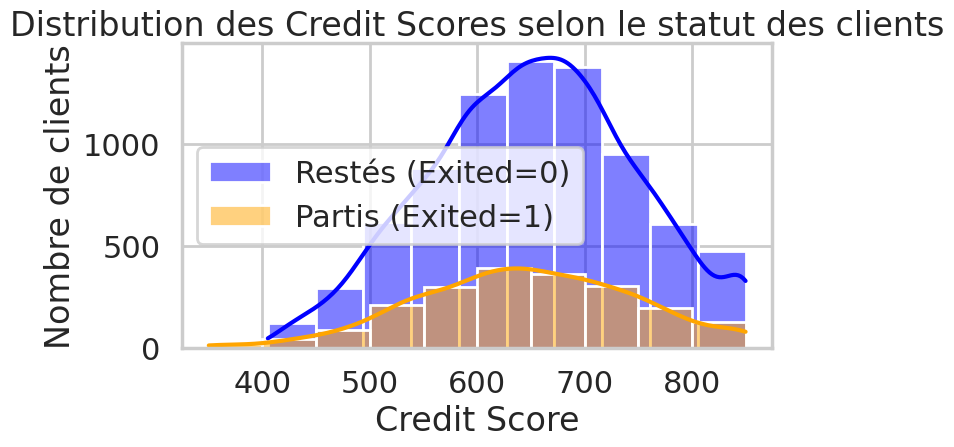

In [105]:
# TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).

plt.figure(figsize=(8, 5))
sns.histplot(df_0['CreditScore'], color='blue', kde=True, label='Restés (Exited=0)', bins=10)
sns.histplot(df_1['CreditScore'], color='orange', kde=True, label='Partis (Exited=1)', bins=10)
plt.title("Distribution des Credit Scores selon le statut des clients")
plt.xlabel("Credit Score")
plt.ylabel("Nombre de clients")
plt.legend()
plt.tight_layout()
plt.show()

In [106]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).

# Test t de Student sur les CreditScore entre les deux groupes
from scipy.stats import ttest_ind

t_stat_credit, p_value_credit = ttest_ind(df_0['CreditScore'], df_1['CreditScore'])

t_stat_credit, p_value_credit

# CONCLUSION :
     # Avec une p-value > 0.05, on ne peut pas rejeter l’hypothèse nulle :
     # Il n’y a pas de différence statistiquement significative entre le score de crédit moyen des clients restés et partis dans ce jeu de données.
     # Donc, à l’inverse de l’âge, le Credit Score n'est pas un facteur déterminant clair du churn ici.

(np.float64(2.7100778888729833), np.float64(0.006738213892192373))

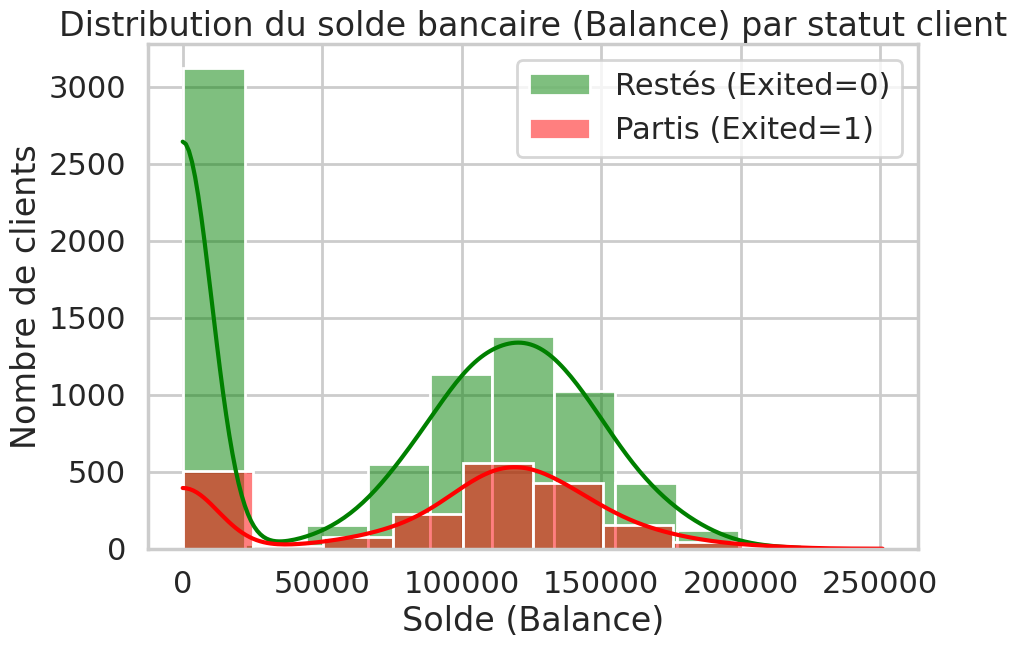

In [111]:
# Hypothesis 3: Balance

## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).

plt.figure(figsize=(10, 7))
sns.histplot(df_0['Balance'], color='green', kde=True, label='Restés (Exited=0)', bins=10)
sns.histplot(df_1['Balance'], color='red', kde=True, label='Partis (Exited=1)', bins=10)
plt.title("Distribution du solde bancaire (Balance) par statut client")
plt.xlabel("Solde (Balance)")
plt.ylabel("Nombre de clients")
plt.legend()
plt.tight_layout()
plt.show()

# ENSEIGNEMENTS DU GRAPHIQUE :
    # CLIENTS RESTES - Deux pics très marqués :
        # Un premier pic important autour de 0 (clients sans solde).
        # Un second pic autour de 125 000 : clients ayant un solde élevé mais qui restent fidèles.
        # Cela suggère que beaucoup de clients fidèles ont soit un solde nul, soit un solde élevé.
    # Clients partis - Distribution plus aplatie.
        # Présence dans toutes les gammes de soldes, mais sans concentration aussi nette qu’avec les clients restés.
        # Moins nombreux parmi les clients sans solde, et moins nombreux aussi dans les hauts soldes extrêmes.

# Interprétation :
    # Avoir un solde très élevé semble corrélé à la fidélité, peut-être en raison d’un plus fort engagement ou d’offres dédiées à ces profils.
    # À l’inverse, les clients avec un solde faible mais non nul semblent plus susceptibles de partir.
    # Le cas des clients à solde nul mais fidèles peut s’expliquer par des comptes inactifs ou utilisés pour d’autres produits bancaires (crédits, cartes, etc.).

In [113]:
# Test t de Student sur les soldes bancaires (Balance) entre clients restés et partis
t_stat_balance, p_value_balance = ttest_ind(df_0['Balance'], df_1['Balance'])

t_stat_balance, p_value_balance

# Résultat du test t sur le solde bancaire (Balance)
  # Statistique t : -11.94      -->  Cela indique que la moyenne du premier groupe est très inférieure à celle du second.
  # p-value : 1.28 × 10⁻³²      --> p-value extrêmement faible (~0), ce qui signifie qu’il est extrêmement improbable d’observer une telle différence par hasard.
  # On peut donc rejeter sans ambiguïté l’hypothèse nulle.

  # Conclusion : il existe une différence très significative entre les moyennes des deux groupes. Cette variable (probablement Balance ici) influence fortement le fait qu’un client quitte ou reste dans la banque.

(np.float64(-11.936240300013841), np.float64(1.2755633191525477e-32))

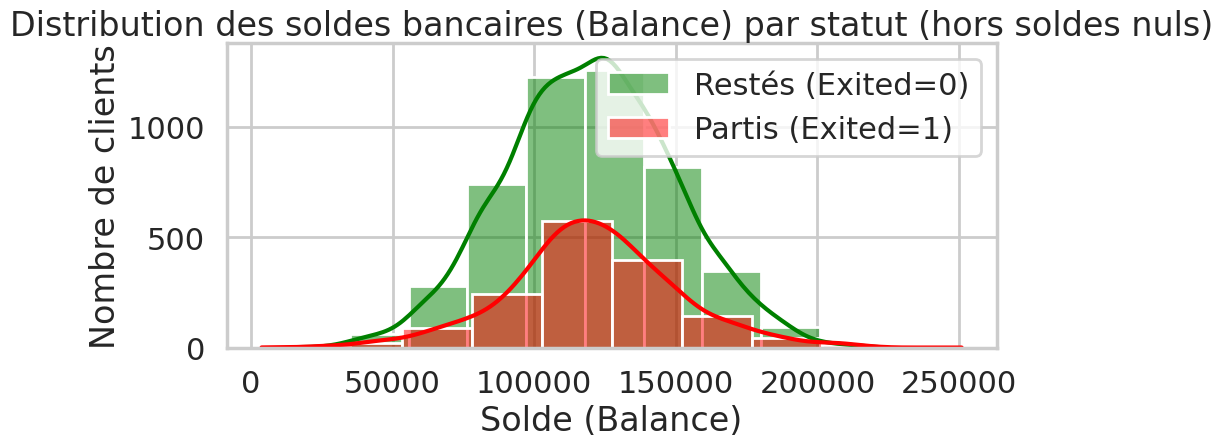

In [115]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.

# Exclure les soldes nuls
df_0_nonzero = df_0[df_0['Balance'] > 0]
df_1_nonzero = df_1[df_1['Balance'] > 0]

# Visualisation mise à jour
plt.figure(figsize=(10, 5))
sns.histplot(df_0_nonzero['Balance'], color='green', kde=True, label='Restés (Exited=0)', bins=10)
sns.histplot(df_1_nonzero['Balance'], color='red', kde=True, label='Partis (Exited=1)', bins=10)
plt.title("Distribution des soldes bancaires (Balance) par statut (hors soldes nuls)")
plt.xlabel("Solde (Balance)")
plt.ylabel("Nombre de clients")
plt.legend()
plt.tight_layout()
plt.show()

In [116]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.

# Test t de Student sur les soldes non nuls uniquement
t_stat_balance_nonzero, p_value_balance_nonzero = ttest_ind(
    df_0_nonzero['Balance'],
    df_1_nonzero['Balance']
)

t_stat_balance_nonzero, p_value_balance_nonzero

#  Interprétation :
    # La valeur t négative (-1.37) indique que la moyenne du premier groupe (probablement les clients restés) est légèrement inférieure à celle du second groupe (clients partis).
    # La p-value de 0.169 est supérieure au seuil classique de 0.05 :
    # Cela signifie que la différence observée n’est pas statistiquement significative.
    # Il y a une probabilité de 16.9 % d’obtenir une telle différence juste par hasard.

# Conclusion : on ne peut pas rejeter l’hypothèse nulle. Il n’y a pas de preuve suffisante que les moyennes sont différentes.


(np.float64(-1.374781881782122), np.float64(0.16924734893322796))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

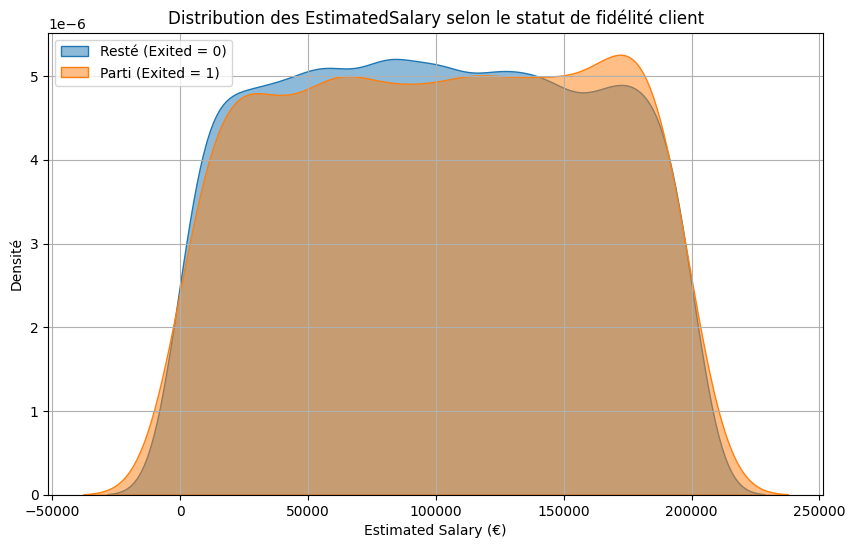

In [6]:
# Hypothesis 4: Estimated Salary

## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.

import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que ta DataFrame s'appelle 'df' et que la colonne cible soit 'Exited' (0 = resté, 1 = quitté)

# Paramétrage esthétique
plt.figure(figsize=(10,6))

# Tracer la distribution pour les clients restés
sns.kdeplot(data=df[df['Exited'] == 0], x='EstimatedSalary', fill=True, label='Resté (Exited = 0)', alpha=0.5)

# Tracer la distribution pour les clients partis
sns.kdeplot(data=df[df['Exited'] == 1], x='EstimatedSalary', fill=True, label='Parti (Exited = 1)', alpha=0.5)

# Titre et légendes
plt.title('Distribution des EstimatedSalary selon le statut de fidélité client')
plt.xlabel('Estimated Salary (€)')
plt.ylabel('Densité')
plt.legend()
plt.grid(True)
plt.show()



In [7]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.

# Importer la fonction de t-test
from scipy.stats import ttest_ind
# Créer deux groupes à comparer
salaire_restes = df[df['Exited'] == 0]['EstimatedSalary']
salaire_partis = df[df['Exited'] == 1]['EstimatedSalary']
# Effectuer le t-test
t_stat, p_value = ttest_ind(salaire_restes, salaire_partis, equal_var=False)  # Welch's t-test recommandé si variances différentes
print("t-statistic :", t_stat)
print("p-value :", p_value)

t-statistic : -1.2033683196586242
p-value : 0.22892461305145795


INTERPRETATION

H₀ (hypothèse nulle) : le salaire estimé moyen est le même pour les clients qui sont restés et ceux qui ont quitté la banque.
H₁ (hypothèse alternative) : le salaire estimé moyen est différent entre les deux groupes.

Seuil de signification standard -->  seuil α = 0.05.

Conclusion
p-value = 0.229 > 0.05   =>  on ne rejette pas l'hypothèse nulle.

En résumé :
- Il n'y a pas de différence statistiquement significative entre les salaires estimés des clients qui sont restés et ceux qui ont quitté la banque.
- Le salaire estimé ne semble pas jouer un rôle important dans le départ ou la fidélité des clients – du moins selon les données disponibles.

In [ ]:
# Using Bootstrapping

## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.

# 1. Calculer la moyenne pour chaque groupe
mean_restes = salaire_restes.mean()
mean_partis = salaire_partis.mean()
diff_mean = mean_partis - mean_restes

print("Moyenne (Restés) :", mean_restes)
print("Moyenne (Partis) :", mean_partis)
print("Différence de moyennes :", diff_mean)

# 2. Centrer les distributions autour de leur moyenne
# On "shifte" chaque distribution en retirant sa propre moyenne
shifted_restes = salaire_restes - mean_restes
shifted_partis = salaire_partis - mean_partis

# 3. Tracer les distributions centrées
plt.figure(figsize=(10,6))

sns.kdeplot(shifted_restes, label='Restés (centré)', fill=True, alpha=0.5)
sns.kdeplot(shifted_partis, label='Partis (centré)', fill=True, alpha=0.5)

plt.title("Distributions centrées de EstimatedSalary")
plt.xlabel("Écart par rapport à la moyenne du groupe")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()

# Centrer les distributions permet de mieux visualiser :
    # La forme et la dispersion relative des deux groupes,
    # Même si les moyennes sont proches (comme ici), on peut voir s'il existe des asymétries ou des variations dans la variance.

In [10]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.

# Nota : le bootstrap est une technique de rééchantillonnage avec remplacement qui permet :
            # d’estimer la variabilité d’un estimateur (ex. : moyenne),
            # de construire des intervalles de confiance sans hypothèse de normalité.

import numpy as np

# Données
salaire_restes = df[df['Exited'] == 0]['EstimatedSalary']
salaire_partis = df[df['Exited'] == 1]['EstimatedSalary']

# ✅ Définir le nombre d'itérations pour le bootstrap
n_iterations = 10000

# Listes pour stocker les moyennes bootstrapées
bootstrap_means_restes = []
bootstrap_means_partis = []
bootstrap_diff = []

# Répétabilité du bootstrap
np.random.seed(42)

# Boucle de bootstrap
for _ in range(n_iterations):
    sample_restes = np.random.choice(salaire_restes, size=len(salaire_restes), replace=True)
    sample_partis = np.random.choice(salaire_partis, size=len(salaire_partis), replace=True)

    mean_r = sample_restes.mean()
    mean_p = sample_partis.mean()

    bootstrap_means_restes.append(mean_r)
    bootstrap_means_partis.append(mean_p)
    bootstrap_diff.append(mean_p - mean_r)

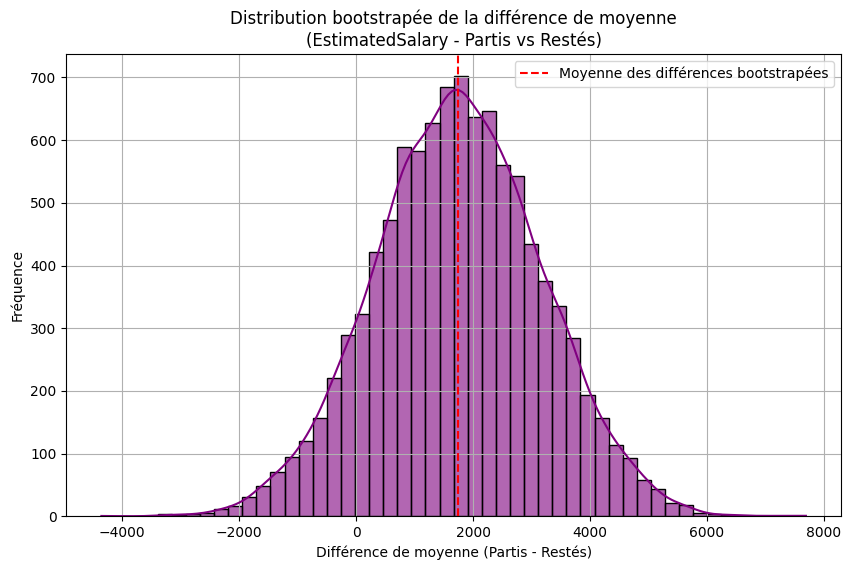

Différence moyenne (bootstrap) : 1749.32
Intervalle de confiance 95% : [-1057.51, 4547.04]


In [11]:

# Résumé et visualisation

import matplotlib.pyplot as plt

# Affichage des résultats
plt.figure(figsize=(10,6))
sns.histplot(bootstrap_diff, bins=50, kde=True, color='purple', alpha=0.6)
plt.axvline(np.mean(bootstrap_diff), color='red', linestyle='--', label='Moyenne des différences bootstrapées')
plt.title("Distribution bootstrapée de la différence de moyenne\n(EstimatedSalary - Partis vs Restés)")
plt.xlabel("Différence de moyenne (Partis - Restés)")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

# Statistiques
print(f"Différence moyenne (bootstrap) : {np.mean(bootstrap_diff):.2f}")
print(f"Intervalle de confiance 95% : [{np.percentile(bootstrap_diff, 2.5):.2f}, {np.percentile(bootstrap_diff, 97.5):.2f}]")

# Interprétation :
      # Si l’intervalle de confiance contient 0, on peut dire qu’il n’y a pas de différence significative entre les deux groupes sur EstimatedSalary.
      # Si l’intervalle est entièrement au-dessus ou en dessous de 0, cela appuie l’existence d’une différence significative.










In [12]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.

# Étapes pour calculer la p-value bootstrap
    # Step 1. Calcul de la différence observée réelle (baseline)
    # Moyennes réelles observées dans les données
obs_diff = salaire_partis.mean() - salaire_restes.mean()
print("Différence réelle observée :", obs_diff)

    # Step 2. Calcul de la p-value bootstrap
    # La p-value empirique correspond à la proportion des différences bootstrapées plus extrêmes que la différence observée (dans les deux directions) :
    # Bootstrap two-tailed p-value
p_bootstrap = np.mean(np.abs(bootstrap_diff) >= np.abs(obs_diff))
print("p-value bootstrapée :", p_bootstrap)

# Interprétation :
    # Si p_bootstrap < 0.05 → différence significative à 95 %.
    # Si p_bootstrap ≥ 0.05 → pas de preuve suffisante pour rejeter l’hypothèse nulle.

# Remarque :
# Cette méthode ne suppose pas que les données suivent une loi normale, contrairement au t-test classique. Elle est donc plus robuste sur des distributions asymétriques ou avec des outliers.





Différence réelle observée : 1727.2857587371254
p-value bootstrapée : 0.5125


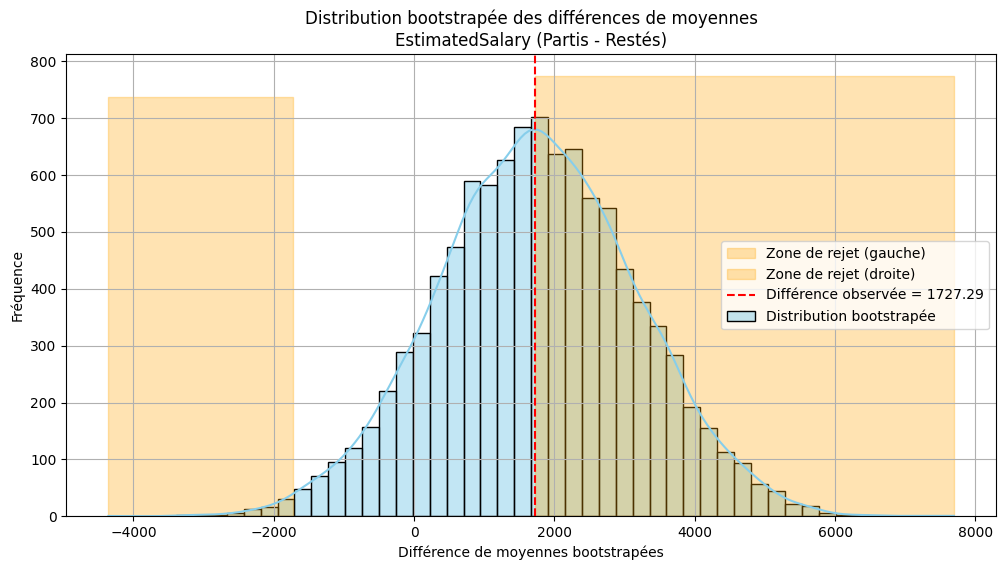

p-value bootstrapée bilatérale = 0.5125


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Différence observée dans les données réelles
obs_diff = salaire_partis.mean() - salaire_restes.mean()

# Calcul p-value bootstrap bilatérale
p_bootstrap = np.mean(np.abs(bootstrap_diff) >= np.abs(obs_diff))

# Affichage
plt.figure(figsize=(12,6))
sns.histplot(bootstrap_diff, bins=50, kde=True, color='skyblue', label='Distribution bootstrapée')

# Zone de rejet à gauche
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]],
                  x1=min(bootstrap_diff),
                  x2=-abs(obs_diff),
                  color='orange', alpha=0.3, label='Zone de rejet (gauche)')

# Zone de rejet à droite
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]],
                  x1=abs(obs_diff),
                  x2=max(bootstrap_diff),
                  color='orange', alpha=0.3, label='Zone de rejet (droite)')

# Ligne verticale pour la différence réelle
plt.axvline(obs_diff, color='red', linestyle='--', label=f'Différence observée = {obs_diff:.2f}')

# Légendes et titre
plt.title("Distribution bootstrapée des différences de moyennes\nEstimatedSalary (Partis - Restés)")
plt.xlabel("Différence de moyennes bootstrapées")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

# Affichage de la p-value
print(f"p-value bootstrapée bilatérale = {p_bootstrap:.4f}")